Datasets Link:

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_credits.csv

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import string

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movies = pd.read_csv("datasets/tmdb_5000_movies.csv")
credits = pd.read_csv("datasets/tmdb_5000_credits.csv")

In [3]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
movies.shape

(4803, 20)

In [6]:
# Check the null values
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### Check the genres how data it contain

In [7]:
movies.iloc[0, 1]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [8]:
# Another way
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [9]:
movies.iloc[1]['genres']

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

### Check the keywords how data it contain

In [10]:
movies.loc[0, 'keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [11]:
# Count the orginal language columns

movies.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

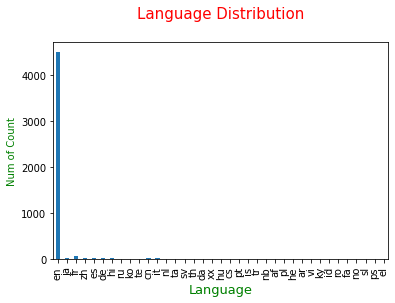

In [12]:
movies.original_language.value_counts(sort=False).plot(kind='bar')

plt.title("Language Distribution\n", fontsize=15, color='red')
plt.xlabel("Language", fontsize=13, color='g')
plt.ylabel("Num of Count", fontsize=10, color='g')
plt.show()

In [13]:
print(movies.original_language.unique())
print("Total language: ",len(movies.original_language.unique()))

['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']
Total language:  37


### Check the overview columns

In [14]:
movies.loc[0, 'overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [15]:
# Now credits data frame

credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
# Check the shape
credits.shape

(4803, 4)

In [17]:
# Check the null value

credits.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [18]:
credits.loc[0, 'cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [19]:
credits.loc[0, 'crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

## Let's merge the datasets

In [20]:
new_df = movies.merge(right=credits, on="title")

new_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [21]:
new_df.shape

(4809, 23)

In [22]:
# Now pick the important columns and work with those columns

movies_df = new_df[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']].copy()

movies_df.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [23]:
movies_df.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [24]:
# Drop the null values
movies_df.dropna(inplace=True)

In [25]:
movies_df.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [26]:
movies_df.shape

(4806, 7)

Basically, Content based recommendation systems idea is to make tags. Based on those tags we recommend top 5 or 10 movies.
So, at first we have to create tags. So, here I gonna merge or add togather the 'genres', 'keywords', 'cast' and 'crew' columns for make tags. Before add togather we have to simplify those columns

In [27]:
movies_df.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [28]:
# This is a string so we fast convert it into list of dict

movies_df.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [29]:
# Demo

x = '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
ast.literal_eval(x)

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [30]:
# Let's make function to simplify those columns

# Here, our main aim is to extract the genres type or name like 'action', 'adventure' so on

def simplify(text):
    lis = []
    for i in ast.literal_eval(text):
        lis.append(i['name'])
    return lis
        

In [31]:
movies_df['genres'] = movies_df['genres'].apply(func=simplify)

In [32]:
movies_df.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [33]:
movies_df.loc[0, 'genres']

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [34]:
# For keywords column
movies_df['keywords'] = movies_df['keywords'].apply(func=simplify)

In [35]:
movies_df.loc[0, 'keywords']

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [36]:
# Now for the cast columns we just take first three actor or actress name from the dictionary

def simplify2(text):
    lis = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            lis.append(i['name'])
        counter += 1
    return lis

In [37]:
movies_df['cast'] = movies_df['cast'].apply(func=simplify2)

In [38]:
movies_df.loc[0, 'cast']

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [39]:
# movies_df['cast'].apply(func=lambda x:x[0:3])

In [40]:
# For the crew columns fetch the name based on the director

def fetch_director(text):
    lis = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            lis.append(i['name'])
    return lis

In [41]:
movies_df['crew'] = movies_df['crew'].apply(func=fetch_director)

In [42]:
movies_df.loc[0, 'crew']

['James Cameron']

In [43]:
movies_df.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
1636,72207,The Five-Year Engagement,"Exactly one year after Tom meets Violet, he su...",[Comedy],"[sex, san francisco, restaurant, frustration, ...","[Jason Segel, Emily Blunt, Chris Pratt]",[Nicholas Stoller]
513,9802,The Rock,A group of renegade marine commandos seizes a ...,"[Action, Adventure, Thriller]","[san francisco, fbi, gas attack, alcatraz, hos...","[Sean Connery, Nicolas Cage, Ed Harris]",[Michael Bay]
1103,58233,Johnny English Reborn,The most prominent heads of state in the world...,"[Crime, Adventure, Action, Comedy, Thriller]","[buddhist monk, cooking, prime minister, kitch...","[Rowan Atkinson, Dominic West, Gillian Anderson]",[Oliver Parker]
1352,31908,Ghosts of Mississippi,Ghosts of Mississippi is a drama covering the ...,"[History, Drama]","[assassin, widow, trial, civil rights, activist]","[Alec Baldwin, James Woods, Virginia Madsen]",[Rob Reiner]
2039,11453,Deuce Bigalow: European Gigolo,Deuce Bigalow goes to Amsterdam after a little...,[Comedy],"[painter, amsterdam, dolphin, europe, pimp, fe...","[Rob Schneider, Eddie Griffin, Jeroen Krabbé]",[Mike Bigelow]


In [44]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [45]:
# Remove the white space from the text to remove the name conflict

def remove_whitespace(L):
    lis = []
    for i in L:
        lis.append(i.replace(" ", ""))
    return lis

In [46]:
movies_df['genres'] = movies_df['genres'].apply(func=remove_whitespace)
movies_df['keywords'] = movies_df['keywords'].apply(func=remove_whitespace)
movies_df['cast'] = movies_df['cast'].apply(func=remove_whitespace)
movies_df['crew'] = movies_df['crew'].apply(func=remove_whitespace)

In [47]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [48]:
# make the overview columns as list

movies_df['overview'] = movies_df['overview'].apply(func=lambda x : x.split())

movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [49]:
# Now we just merge the 'overview','genres','keywords','cast' and 'crew' columns to make tags and creat a new columns name is 'tags'

movies_df['tags'] = movies_df['overview'] + movies_df['genres'] + movies_df['keywords'] + movies_df['cast'] + movies_df['crew'] 

In [50]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [51]:
new_movies_df = movies_df.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew'])

In [52]:
new_movies_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [53]:
new_movies_df.shape

(4806, 3)

In [54]:
print(new_movies_df.loc[0, 'tags'])

['In', 'the', '22nd', 'century,', 'a', 'paraplegic', 'Marine', 'is', 'dispatched', 'to', 'the', 'moon', 'Pandora', 'on', 'a', 'unique', 'mission,', 'but', 'becomes', 'torn', 'between', 'following', 'orders', 'and', 'protecting', 'an', 'alien', 'civilization.', 'Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'cultureclash', 'future', 'spacewar', 'spacecolony', 'society', 'spacetravel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marine', 'soldier', 'battle', 'loveaffair', 'antiwar', 'powerrelations', 'mindandsoul', '3d', 'SamWorthington', 'ZoeSaldana', 'SigourneyWeaver', 'JamesCameron']


In [55]:
# Now join the list from tags

new_movies_df['tags'] = new_movies_df['tags'].apply(func=lambda x : " ".join(x))

new_movies_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [56]:
new_movies_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [57]:
# Demo
new_movies_df['tags'].apply(func=lambda x : x.lower())

0       in the 22nd century, a paraplegic marine is di...
1       captain barbossa, long believed to be dead, ha...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war-weary, former military ca...
                              ...                        
4804    el mariachi just wants to play his guitar and ...
4805    a newlywed couple's honeymoon is upended by th...
4806    "signed, sealed, delivered" introduces a dedic...
4807    when ambitious new york attorney sam is sent t...
4808    ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

### Expremient

In [58]:
new_movies_df2 = new_movies_df.copy()

new_movies_df2.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [59]:
new_movies_df2['tags'] = new_movies_df2['tags'].apply(func=lambda x : x.lower())

In [60]:
new_movies_df2['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [63]:
print(new_movies_df2['tags'][0].split())

['in', 'the', '22nd', 'century,', 'a', 'paraplegic', 'marine', 'is', 'dispatched', 'to', 'the', 'moon', 'pandora', 'on', 'a', 'unique', 'mission,', 'but', 'becomes', 'torn', 'between', 'following', 'orders', 'and', 'protecting', 'an', 'alien', 'civilization.', 'action', 'adventure', 'fantasy', 'sciencefiction', 'cultureclash', 'future', 'spacewar', 'spacecolony', 'society', 'spacetravel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marine', 'soldier', 'battle', 'loveaffair', 'antiwar', 'powerrelations', 'mindandsoul', '3d', 'samworthington', 'zoesaldana', 'sigourneyweaver', 'jamescameron']


### Apply porterStemmer

In [65]:
ps = PorterStemmer()

In [69]:
# i.translate(str.maketrans('', '', string.punctuation use this for remove punctuation mark from text

def textStemming(text):
    lis = []
    for i in text.split():
        lis.append(ps.stem(word=i.translate(str.maketrans('', '', string.punctuation))))
    return " ".join(lis)

In [70]:
new_movies_df2['tags'] = new_movies_df2['tags'].apply(func=textStemming)

In [71]:
new_movies_df2['tags'][0]

'in the 22nd centuri a parapleg marin is dispatch to the moon pandora on a uniqu mission but becom torn between follow order and protect an alien civil action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [72]:
new_movies_df2.head()

,movie_id,title,tags
0,19995,Avatar,in the 22nd centuri a parapleg marin is dispat...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believ to be dead ha com...
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,john carter is a warweari former militari capt...


In [73]:
new_movies_df2.shape

(4806, 3)

In [74]:
new_movies_df2['tags'][1300]

'a pair of age box rival are coax out of retir to fight one final bout  30 year after their last match comedi fathersonrelationship sport rivalri elderli elderlyman robertdeniro sylvesterstallon alanarkin peterseg'

### Apply CounterVectorizer

In [75]:
cv = CountVectorizer(max_features=5000, stop_words='english')

In [76]:
cv_vector = cv.fit_transform(raw_documents=new_movies_df2['tags']).toarray()

In [77]:
cv_vector.shape

(4806, 5000)

In [78]:
cv_vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
cv.get_feature_names_out()

array(['007', '10', '100', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [80]:
cv_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity

In [81]:
similarity = cosine_similarity(X=cv_vector)

In [82]:
similarity.shape

(4806, 4806)

In [83]:
similarity[0]

array([1.        , 0.08471737, 0.0860309 , ..., 0.06503325, 0.02391824,
       0.        ])

In [84]:
similarity[1]

array([0.08471737, 1.        , 0.06154575, ..., 0.02326211, 0.        ,
       0.02752409])

In [85]:
# Find the index position

new_movies_df2[new_movies_df2['title'] == 'Avatar']

,movie_id,title,tags
0,19995,Avatar,in the 22nd centuri a parapleg marin is dispat...


In [86]:
new_movies_df2[new_movies_df2['title'] == 'Avatar'].index

Int64Index([0], dtype='int64')

In [87]:
new_movies_df2[new_movies_df2['title'] == 'Avatar'].index[0]

0

In [88]:
# Demo

sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x : x[1])[:20]

[(0, 1.0000000000000002),
 (2409, 0.26600795837367097),
 (539, 0.25038669783359574),
 (507, 0.24924389543835837),
 (1216, 0.2419049514585557),
 (1204, 0.2418254167033373),
 (260, 0.233086618699226),
 (778, 0.23174488732966073),
 (1194, 0.22710998958306755),
 (61, 0.22269966704152225),
 (1920, 0.22264681319788207),
 (2786, 0.21459876881973805),
 (2999, 0.21239769762143662),
 (973, 0.2108663315950723),
 (322, 0.2105263157894737),
 (972, 0.2073221072156823),
 (83, 0.20647416048350561),
 (172, 0.20295302744752153),
 (151, 0.2029530274475215),
 (466, 0.2029530274475215)]

In [89]:
# Access a particular movie

new_movies_df2.iloc[5, 1]

'Spider-Man 3'

In [90]:
# Movies Recommendation function

def recommenderDemo(movie):
    movie_index = new_movies_df2[new_movies_df2['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[movie_index])), reverse=True, key=lambda x : x[1])
    for i in distances[1:11]:
        print(i)

In [91]:
recommenderDemo('Avatar')

(2409, 0.26600795837367097)
(539, 0.25038669783359574)
(507, 0.24924389543835837)
(1216, 0.2419049514585557)
(1204, 0.2418254167033373)
(260, 0.233086618699226)
(778, 0.23174488732966073)
(1194, 0.22710998958306755)
(61, 0.22269966704152225)
(1920, 0.22264681319788207)


In [92]:
recommenderDemo('John Carter')

(3093, 0.2809757434745082)
(1322, 0.2757764159222963)
(3377, 0.2688774478590815)
(1220, 0.25999999999999995)
(270, 0.2599734734478726)
(1257, 0.25776089301153055)
(193, 0.2545584412271571)
(610, 0.2519763153394848)
(1943, 0.2496150883013531)
(939, 0.24836816822602653)


In [93]:
# Movies Recommendation function

def recommender(movie):
    movie_index = new_movies_df2[new_movies_df2['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[movie_index])), reverse=True, key=lambda x : x[1])
    for i in distances[1:11]:
        print(new_movies_df2.loc[i[0], 'title'])

In [94]:
recommender('Avatar')

Aliens
Titan A.E.
Independence Day
Aliens vs Predator: Requiem
Predators
Ender's Game
Meet Dave
Small Soldiers
Jupiter Ascending
Lifeforce


In [95]:
recommender('John Carter')

The Iceman
Riddick
Split Second
Paul
The Martian
Get Carter
After Earth
The Legend of Hercules
King's Ransom
I Am Number Four


### Apply TF-IDF

In [96]:
tf_idf = TfidfVectorizer(max_features=5000, stop_words="english")

In [97]:
tf_idf_vectors = tf_idf.fit_transform(raw_documents=new_movies_df2['tags']).toarray()

In [98]:
tf_idf.get_feature_names_out()

array(['007', '10', '100', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [99]:
tf_idf_vectors[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [100]:
tf_idf_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
similarity2 = cosine_similarity(X=tf_idf_vectors)

In [102]:
similarity2[0]

array([1.        , 0.02264432, 0.03105097, ..., 0.04570036, 0.00556679,
       0.        ])

In [103]:
similarity2[2]

array([0.03105097, 0.01332907, 1.        , ..., 0.02316455, 0.        ,
       0.        ])

In [104]:
# Movies Recommendation function

def recommenderDemo2(movie):
    movie_index = new_movies_df2[new_movies_df2['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity2[movie_index])), reverse=True, key=lambda x : x[1])
    for i in distances[1:11]:
        print(i)

In [105]:
recommenderDemo2('Avatar')

(2409, 0.2534510924658336)
(47, 0.1760827036356825)
(3608, 0.17544259321251438)
(778, 0.16856230606169256)
(1204, 0.16415392929132563)
(539, 0.16056634775915252)
(260, 0.15903412308093534)
(1920, 0.15778817043167884)
(942, 0.15711565813854914)
(3730, 0.14704181542139766)


In [106]:
def recommender2(movie):
    movie_index = new_movies_df2[new_movies_df2['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity2[movie_index])), reverse=True, key=lambda x : x[1])
    for i in distances[1:11]:
        print(new_movies_df2.loc[i[0], 'title'])

In [107]:
recommender2('Avatar')

Aliens
Star Trek Into Darkness
Lone Wolf McQuade
Meet Dave
Predators
Titan A.E.
Ender's Game
Lifeforce
The Book of Life
Anne of Green Gables


In [108]:
recommender2('John Carter')

Mission to Mars
Ghosts of Mars
Get Carter
River's Edge
The Martian
The Bridge on the River Kwai
Red Planet
An Ideal Husband
Meet Dave
Mars Attacks!


### Apply WordNetLemmatizer

In [109]:
new_movies_df3 = new_movies_df.copy()

new_movies_df3.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [110]:
new_movies_df3['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [111]:
new_movies_df3['tags'] = new_movies_df3['tags'].apply(func=lambda a : a.lower())

In [112]:
new_movies_df3['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [113]:
lemmatizer = WordNetLemmatizer()

In [114]:
def textlemmatizer(text):
    lis = []
    for i in text.split():
        lis.append(lemmatizer.lemmatize(word=i.translate(str.maketrans('', '', string.punctuation))))
    return " ".join(lis)

In [115]:
new_movies_df3['tags'] = new_movies_df3['tags'].apply(func=textlemmatizer)

In [116]:
new_movies_df3['tags'][0]

'in the 22nd century a paraplegic marine is dispatched to the moon pandora on a unique mission but becomes torn between following order and protecting an alien civilization action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

### apply CounterVectorizer for WordnetLemmatizer

In [117]:
cv_vector2 = cv.fit_transform(new_movies_df3['tags']).toarray()

In [118]:
cv_vector2.shape

(4806, 5000)

In [119]:
cv_vector2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [120]:
similarity3 = cosine_similarity(X=cv_vector2)

In [121]:
similarity3[0]

array([1.        , 0.08718573, 0.08718573, ..., 0.0474579 , 0.02861819,
       0.        ])

In [122]:
def recommender3(movie):
    movie_index = new_movies_df3[new_movies_df3['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity3[movie_index])), reverse=True, key=lambda x : x[1])
    for i in distances[1:11]:
        print(new_movies_df3.loc[i[0], 'title'])

In [123]:
recommender3('Avatar')

Aliens
Independence Day
Titan A.E.
Ender's Game
Small Soldiers
Aliens vs Predator: Requiem
Lifeforce
Predators
Krull
The Fifth Element


In [124]:
recommender3('John Carter')

Mission to Mars
Star Trek: Insurrection
Escape from Planet Earth
Ghosts of Mars
Independence Day: Resurgence
River's Edge
The Fifth Element
Meet Dave
The Martian
Jurassic World


### apply TF-IDF for WordnetLemmatizer

In [126]:
tf_idf2 = TfidfVectorizer(max_features=5000)

In [127]:
tf_idf_vectors2 = tf_idf2.fit_transform(raw_documents=new_movies_df3['tags']).toarray()

In [128]:
tf_idf_vectors2[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [129]:
tf_idf_vectors2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
similarity4 = cosine_similarity(X=tf_idf_vectors2)

In [131]:
similarity4[2]

array([0.04284621, 0.04563473, 1.        , ..., 0.05075727, 0.02324022,
       0.02080309])

In [132]:
def recommender4(movie):
    movie_index = new_movies_df3[new_movies_df3['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity4[movie_index])), reverse=True, key=lambda x : x[1])
    for i in distances[1:11]:
        print(new_movies_df3.loc[i[0], 'title'])

In [133]:
recommender4('Avatar')

Aliens
Lone Wolf McQuade
The Book of Life
Titan A.E.
Meet Dave
Aliens vs Predator: Requiem
Ender's Game
Star Trek Into Darkness
Independence Day
Predators


In [134]:
recommender4('John Carter')

Ghosts of Mars
Mission to Mars
Get Carter
River's Edge
An Ideal Husband
The Martian
The Bridge on the River Kwai
Red Planet
Mars Attacks!
Total Recall


In [135]:
import pickle

### dataFrame make into pickle

In [136]:
# pickle.dump(obj=new_movies_df2.to_dict(), file=open('movie_df2.pkl','wb'))

In [137]:
# pickle.dump(obj=new_movies_df3.to_dict(), file=open('movie_df3.pkl','wb'))

### Model make into pickle

In [138]:
# pickle.dump(obj=similarity, file=open('similarity.pkl','wb'))
# pickle.dump(obj=similarity2, file=open('similarity2.pkl','wb'))
# pickle.dump(obj=similarity3, file=open('similarity3.pkl','wb'))
# pickle.dump(obj=similarity4, file=open('similarity4.pkl','wb'))

In [139]:
new_movies_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)